In [2]:
import JupyterImport
from FCT import *
from shortTh import *
from delay import *
from QueueLen import *

importing Jupyter notebook from FCT.ipynb
importing Jupyter notebook from shortTh.ipynb
importing Jupyter notebook from delay.ipynb
importing Jupyter notebook from QueueLen.ipynb


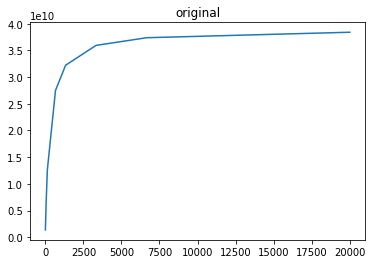

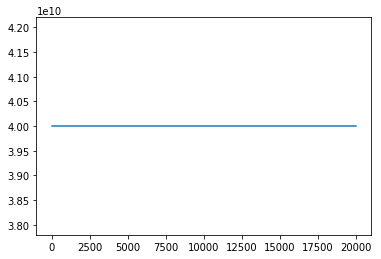

In [2]:
flow_size=[0, 6, 13, 19, 33, 53, 133, 667, 1333, 3333, 6667, 20000, float('inf')]
normalize_lists = loadNormalizeList('/home/ovs2/lining/Gearbox/automatic/flowBenchmark/', flow_size[1:-1])
plt.plot(normalize_lists[0], normalize_lists[1])
plt.title("original")
plt.show()


original_lists=[flow_size[1:-1],[40 * 1e9 for i in range(len(flow_size) - 2)]]
plt.plot(original_lists[0], original_lists[1])



In [3]:
FCT_analysis_normalize = FCT("/home/ovs2/lining/Gearbox/automatic/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)
FCT_analysis_original = FCT("/home/ovs2/lining/Gearbox/automatic/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   original_lists)

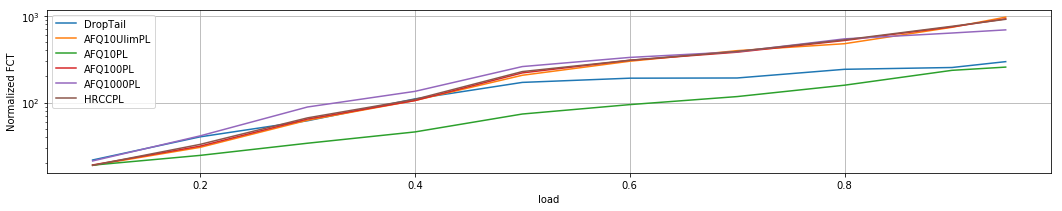

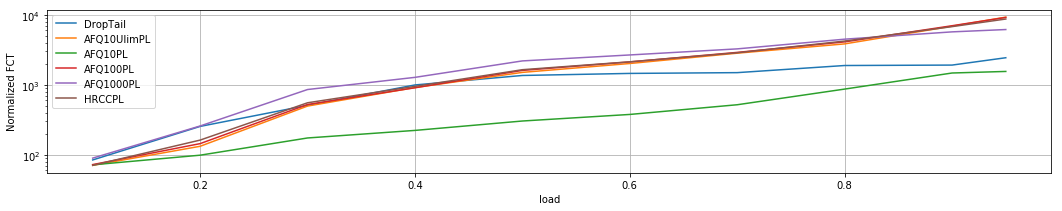

In [4]:
FCT_analysis_normalize.plotting_mean_FCT()
FCT_analysis_original.plotting_mean_FCT()

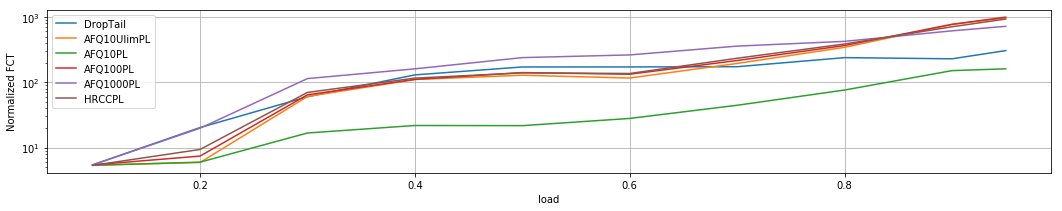

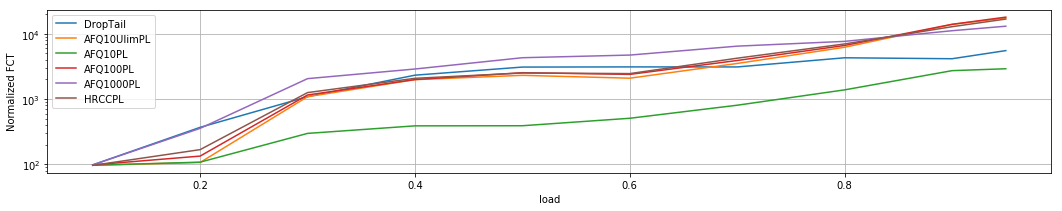

In [5]:
FCT_analysis_normalize.plot_FCT_load(["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], \
                                 [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], 10)
FCT_analysis_original.plot_FCT_load(["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], \
                                 [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], 10)

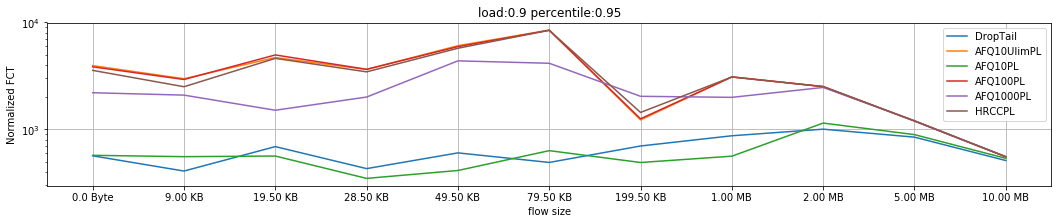

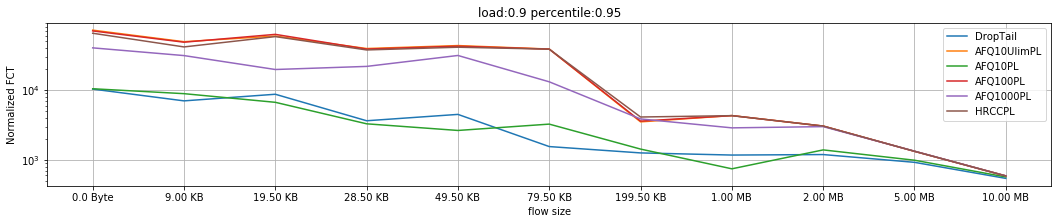

In [6]:
FCT_analysis_normalize.plot_FCT_percentile_fix_load(\
                ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                .9,\
                .95,\
                flow_size)
FCT_analysis_original.plot_FCT_percentile_fix_load(\
                ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                .9,\
                .95,\
                flow_size)

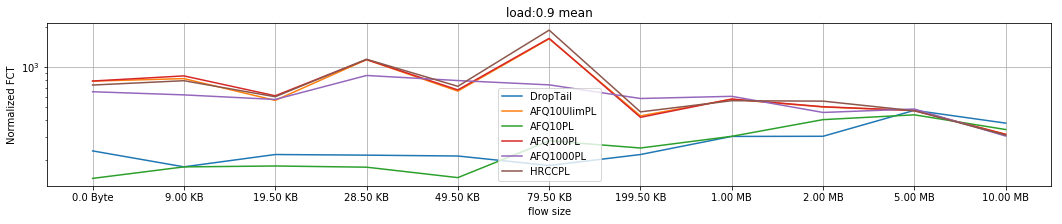

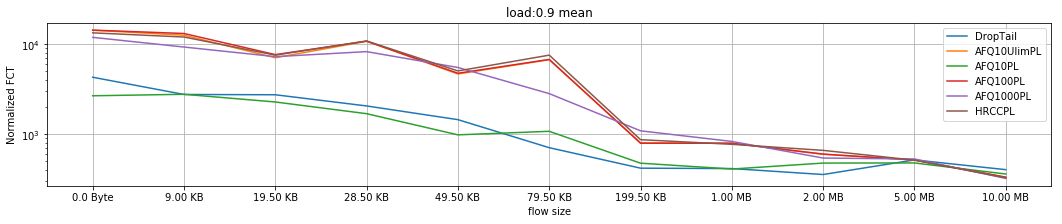

In [7]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)

FCT_analysis_original.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)



## DropTail

In [8]:
## comsume too much time
# if __name__ == '__main__':
#     df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
#                               "DropTail_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
#     plot_short_th(df_out_tr_6, 12, 83)

In [3]:
df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
                              "DropTail_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
#df_out = df_out.loc[df_out["fid"].isin([180])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()

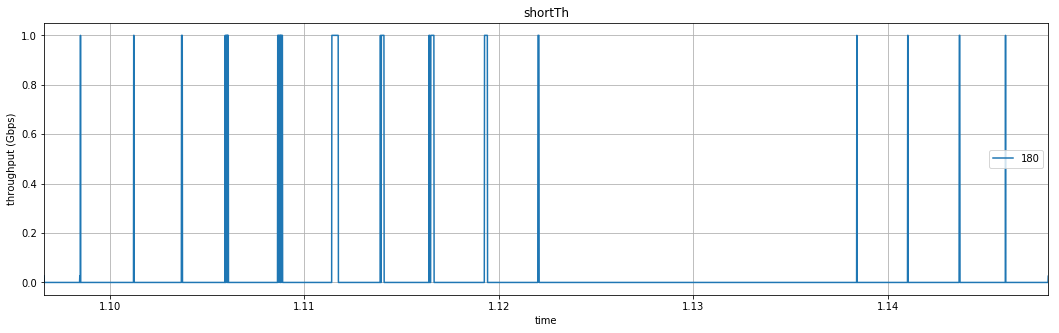

In [34]:
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

In [9]:
df = df_out_tr_6
df_out = df.loc[df["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["fid"].isin([180])]
display(df_out.head(20))
print("from", df_out.from_node.unique())
print("to", df_out.to_node.unique())

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
252980,+,1.095139,29,13,tcp,40,C--A---,180,29.7,83.92,0,16806
252981,-,1.095139,29,13,tcp,40,C--A---,180,29.7,83.92,0,16806
252985,r,1.095140,29,13,tcp,40,C--A---,180,29.7,83.92,0,16806
252986,+,1.095140,13,0,tcp,40,C--A---,180,29.7,83.92,0,16806
252987,-,1.095140,13,0,tcp,40,C--A---,180,29.7,83.92,0,16806
252991,r,1.095141,13,0,tcp,40,C--A---,180,29.7,83.92,0,16806
252992,+,1.095141,0,8,tcp,40,C--A---,180,29.7,83.92,0,16806
252993,-,1.095141,0,8,tcp,40,C--A---,180,29.7,83.92,0,16806
252997,r,1.095142,0,8,tcp,40,C--A---,180,29.7,83.92,0,16806
252998,+,1.095142,8,6,tcp,40,C--A---,180,29.7,83.92,0,16806


from [29 13  0  8  6 19]
to [13  0  8  6 19 83]


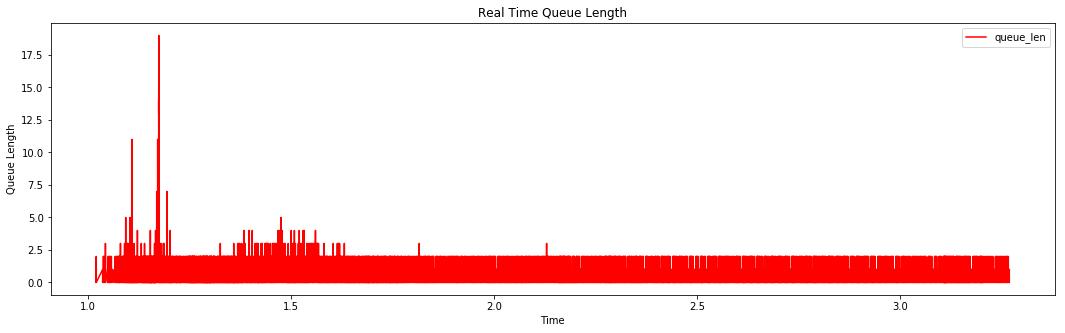

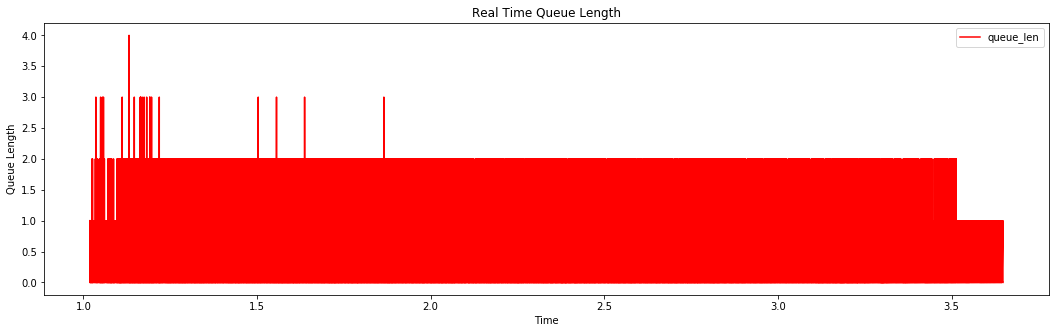

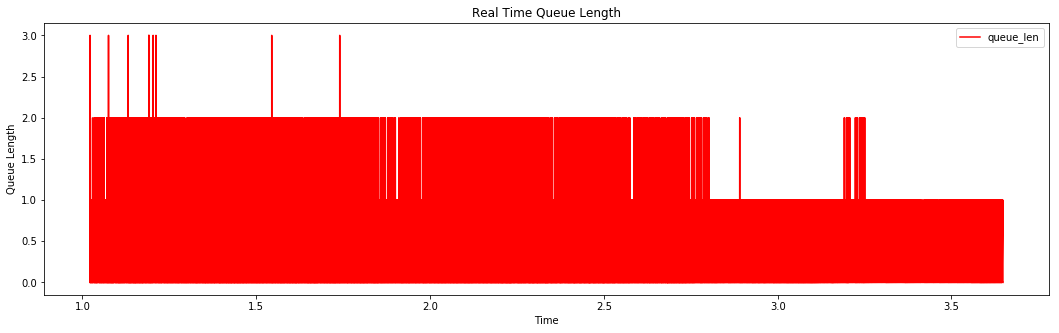

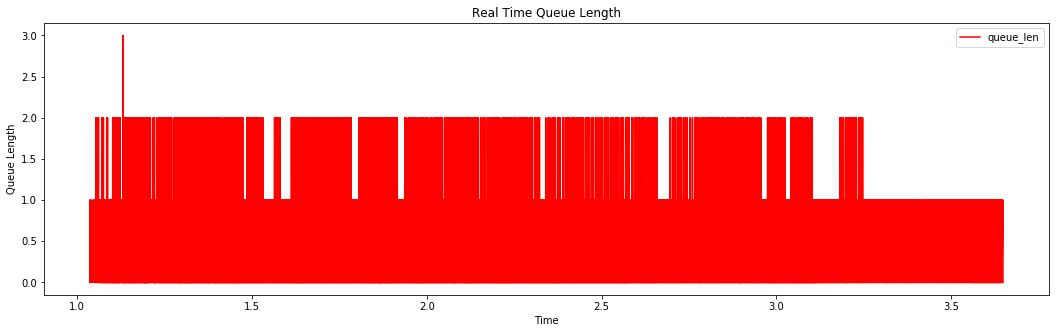

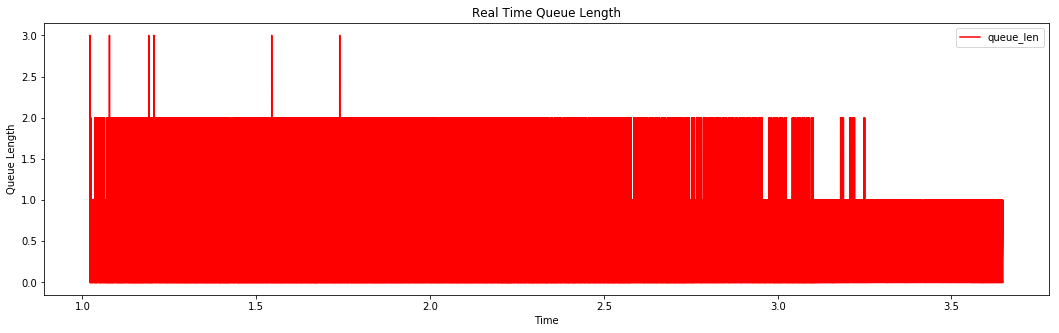

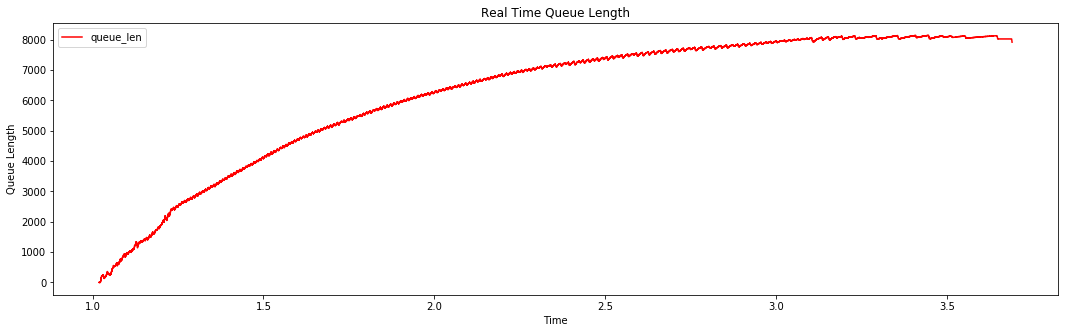

In [10]:
for switch in df_out.from_node.unique():
    cal_queue_len(df_out_tr_6, switch)

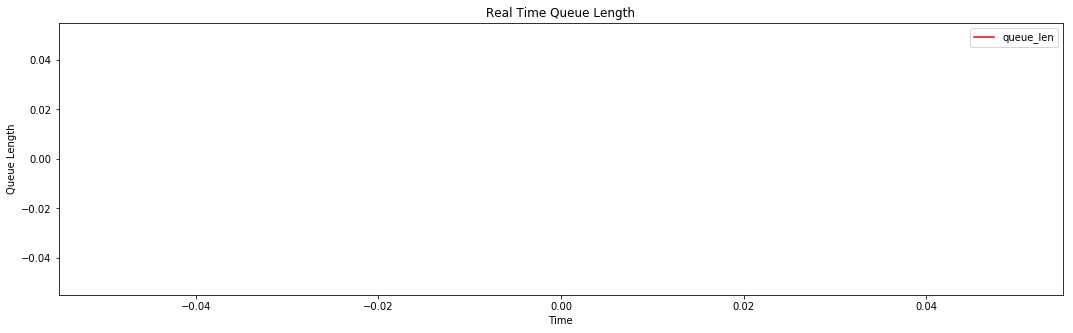

In [11]:
cal_queue_len(df_out_tr_6, 83)

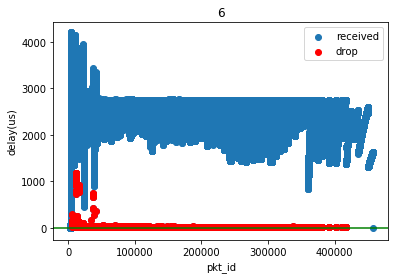

In [17]:
Delay_6 = DelayAnalysis("/home/ovs2/lining/Gearbox/automatic/", \
                        "DropTail_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## AFQ10PL

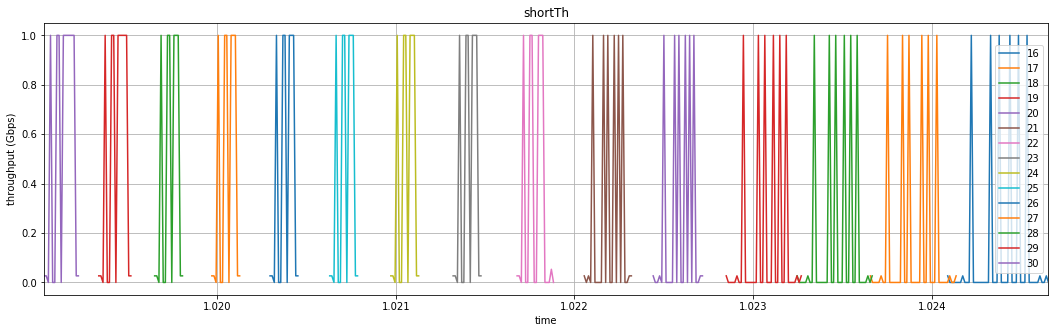

In [24]:
df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
                              "AFQ10PL_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

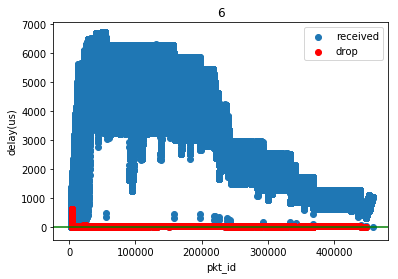

In [25]:
Delay_6 = DelayAnalysis("/home/ovs2/lining/Gearbox/automatic/", \
                        "AFQ10PL_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

## HRCCPL

In [ ]:
df_out_tr_6 = read_out_tr("/home/ovs2/lining/Gearbox/automatic/", \
                              "HRCCPL_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
df = df_out_tr_6
df_out = df.loc[df["events"].isin(["r"])]
df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
df_out = df_out.loc[df_out["to_node"].isin([83])]
df_out = df_out[['time', 'pkt_size', 'fid']]
r_event_in_dst = df_out
r_event_in_dst['ts'] = r_event_in_dst['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
grouped=r_event_in_dst.groupby('fid')
shortTh = grouped[['ts', 'pkt_size']].resample(str(12) + 'U', on='ts').sum()
shortTh['throughtput'] = shortTh['pkt_size']*8 / (12 * 1e-6) / 1000 / 1000 / 1000
res = shortTh[['throughtput']]

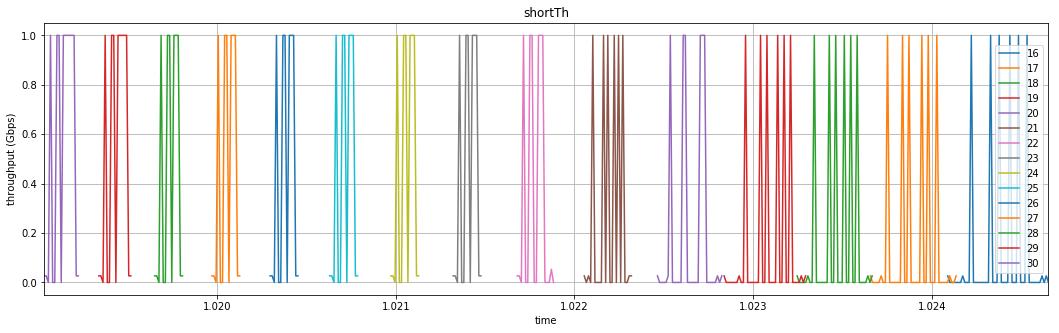

In [29]:
ax=None
cnt = 0
fids=[]
for fid, _ in grouped:
    res_fid = res.loc[fid]
    res_fid['time'] = res_fid.index / timedelta(seconds=1)
    ax=res_fid.plot(x='time', y='throughtput', ax=ax, figsize=(18,5), kind='line', legend=True, title='shortTh', grid=True)
    fids.append(fid)
    cnt += 1
    if cnt == 15:
        break
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.legend(fids)
plt.show()

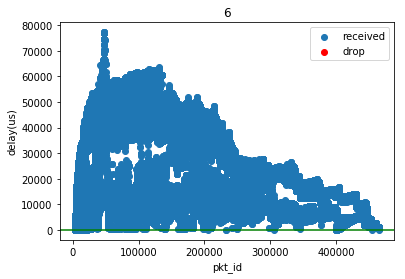

In [27]:
Delay_6 = DelayAnalysis("/home/ovs2/lining/Gearbox/automatic/", \
                        "HRCCPL_flow_200_0.9_Topology-incast-singlenode-large-number-8.tcl_out.tr")
Delay_6.print_pkt_delay(12, '6')

In [21]:
FCT_analysis_normalize = FCT("/home/ovs2/lining/Gearbox/automatic/queueSize506/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   normalize_lists)
FCT_analysis_original = FCT("/home/ovs2/lining/Gearbox/automatic/queueSize506/", \
                   "Topology-incast-singlenode-large-number-8.tcl",\
                   200, \
                   [.1, .2, .3, .4, .5, .6, .7, .8, .9, .95], \
                   ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"],\
                   original_lists)

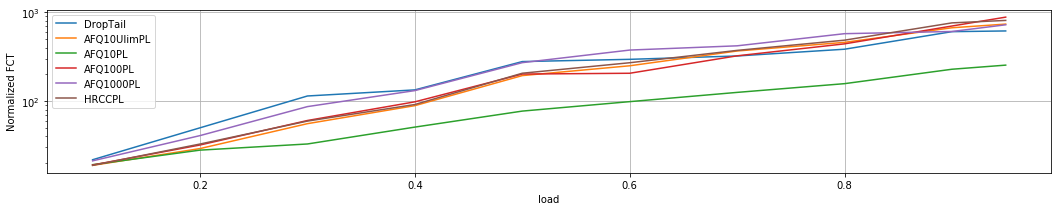

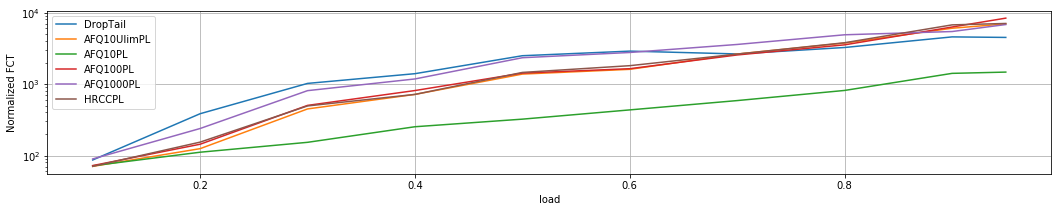

In [22]:
FCT_analysis_normalize.plotting_mean_FCT()
FCT_analysis_original.plotting_mean_FCT()

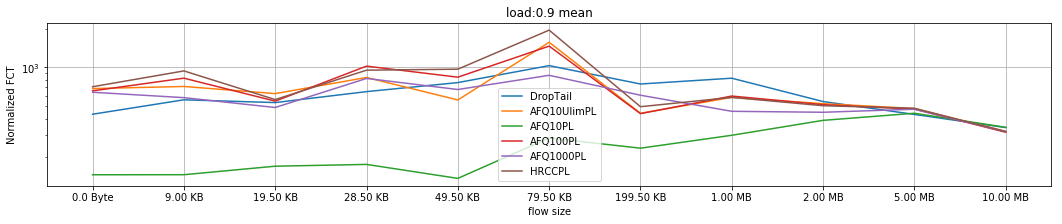

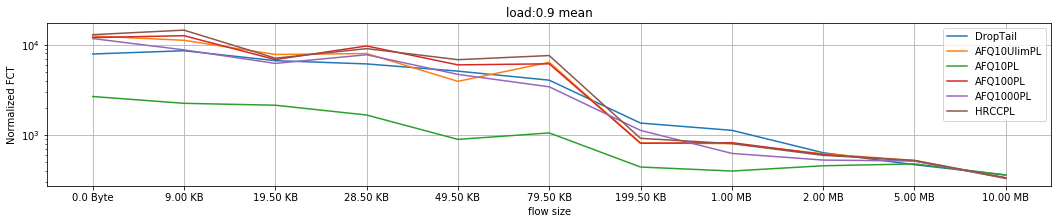

In [23]:
FCT_analysis_normalize.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)

FCT_analysis_original.plot_Mean_FCT_fix_load(
    ["DropTail", "AFQ10UlimPL", "AFQ10PL", "AFQ100PL", "AFQ1000PL", "HRCCPL"], 0.9, flow_size)
